Similar notebook: https://www.kaggle.com/code/shivavashishtha/stackoverflow-eda

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:02, 32792989.34it/s]                               


16384it [00:00, 67505.72it/s]           


8192it [00:00, 40860.53it/s]            


In [8]:
import os

In [9]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'README.txt', 'survey_results_schema.csv']

In [10]:
import pandas as pd

In [11]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [12]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [13]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [14]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [15]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [16]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [17]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [18]:
len(selected_columns)

20

In [19]:
survey_df = survey_raw_df[selected_columns].copy()

In [20]:
schema = schema_raw[selected_columns]

In [21]:
survey_df.shape

(64461, 20)

In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [23]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [25]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [26]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [27]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385
"Man;Non-binary, genderqueer, or gender non-conforming",121
"Woman;Non-binary, genderqueer, or gender non-conforming",92
Woman;Man,73
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25


In [28]:
import numpy as np

In [29]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [30]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
59605,Canada,46.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,8.0,38.0,30.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Bash/Shell/PowerShell;C;C#;C++;Go;HTML/CSS;Jav...,Every few months,Call a coworker or friend;Do other work and co...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",40.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Somewhat important
34645,United States,27.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,18.0,7.0,4.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,C#;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Once a year,Visit Stack Overflow;Panic;Do other work and c...,Employed full-time,"Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Somewhat important
111,United States,50.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",Yes,12.0,35.0,20.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, desktop or enterprise applications",55.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Very important
18542,Brazil,43.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",No,10.0,31.0,20.0,C;C#;C++;Dart;HTML/CSS;JavaScript;SQL,C;C#;C++;Dart;HTML/CSS;JavaScript;SQL,Every few months,Play games;Visit Stack Overflow,"Independent contractor, freelancer, or self-em...",Academic researcher;Data or business analyst;D...,72.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,NaN,Critically important
37264,United Kingdom,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;Python;TypeScript,C#;HTML/CSS;JavaScript;Python;TypeScript,Every few months,Go for a walk or other physical activity;Do ot...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
6984,Canada,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,5.0,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Python;Rust;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN
37890,India,NaN,NaN,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
55165,France,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,12.0,26.0,15.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,NaN,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Database administrator;Developer, desktop or e...",36.0,Neither satisfied nor dissatisfied,NaN,Sometimes: 1-2 days per month but less than we...,Somewhat important
39174,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,11.0,9.0,2.0,C;C#;C++;HTML/CSS;Java;JavaScript;SQL;TypeScript,C;C#;C++;HTML/CSS;JavaScript;Python;R;SQL;Type...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,Critically important
20983,Canada,47.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,10.0,37.0,23.0,Bash/Shell/PowerShell;C#;Java;SQL,Bash/Shell/PowerShell;C#;Go;Python;Scala,Every few mon

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
schema.Country

'Where do you live?'

In [33]:
survey_df.Country.nunique()

183

In [34]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

,count
Country,
United States,12371
India,8364
United Kingdom,3881
Germany,3864
Canada,2175
France,1884
Brazil,1804
Netherlands,1332
Poland,1259


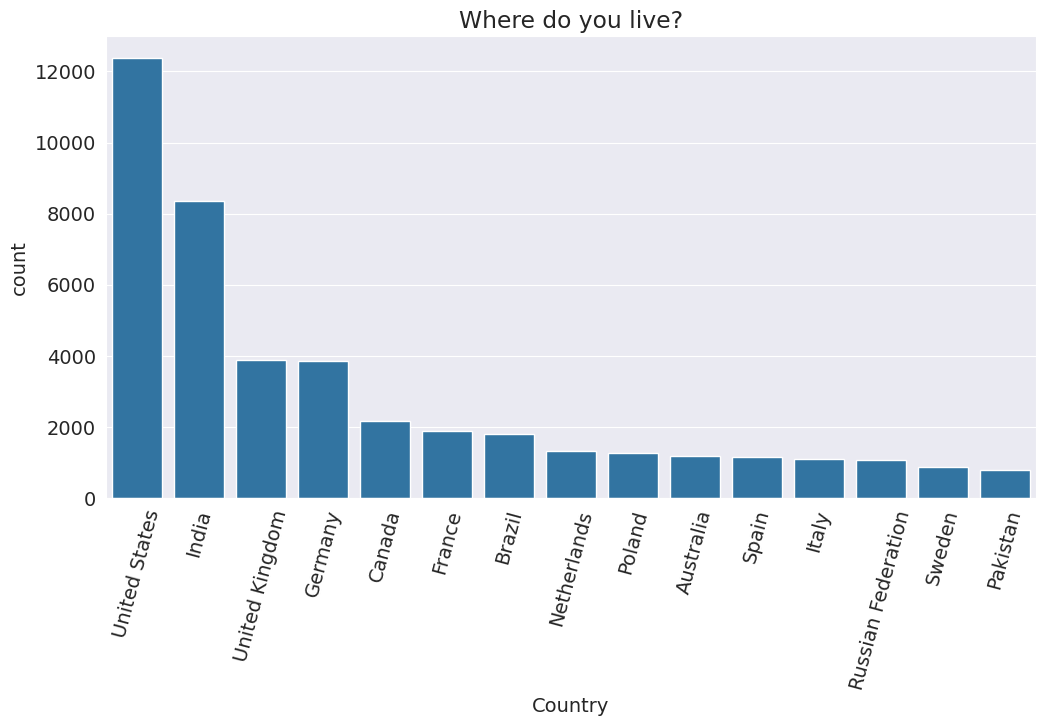

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

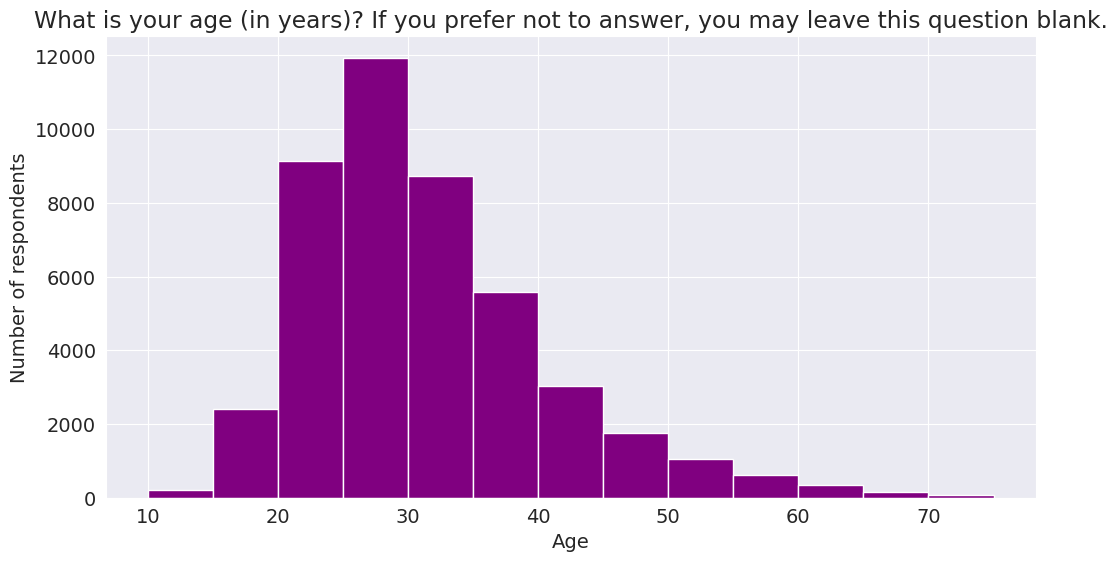

In [36]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

In [37]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [38]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385


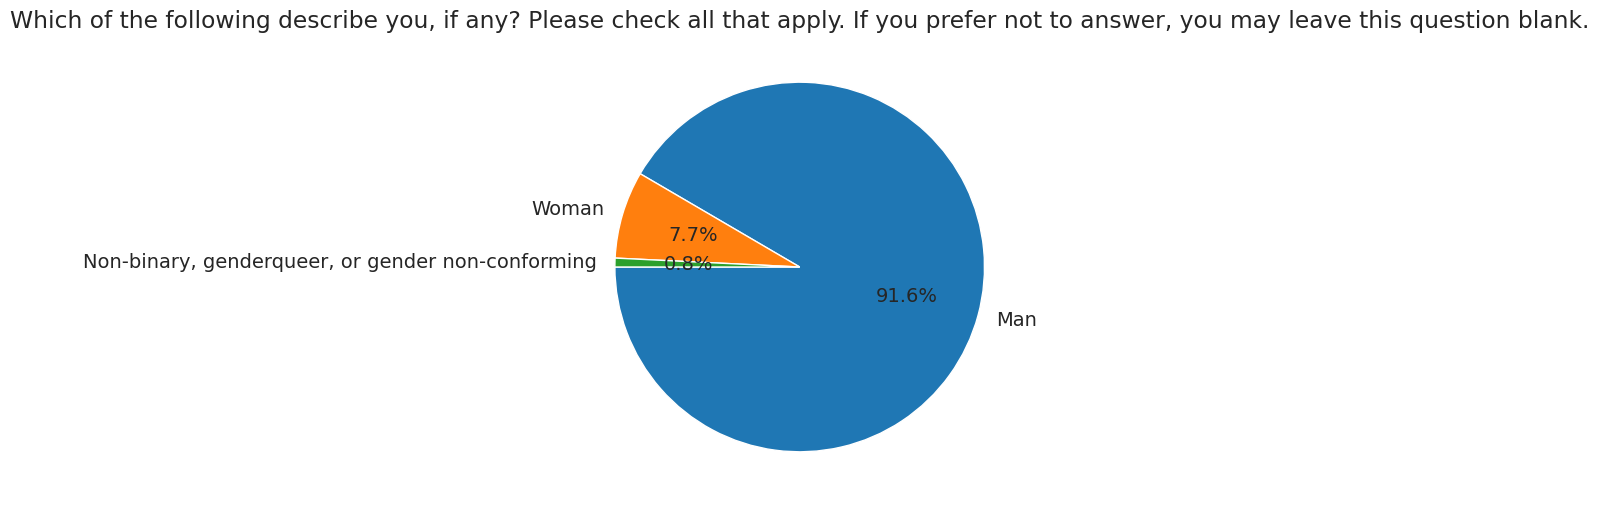

In [39]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

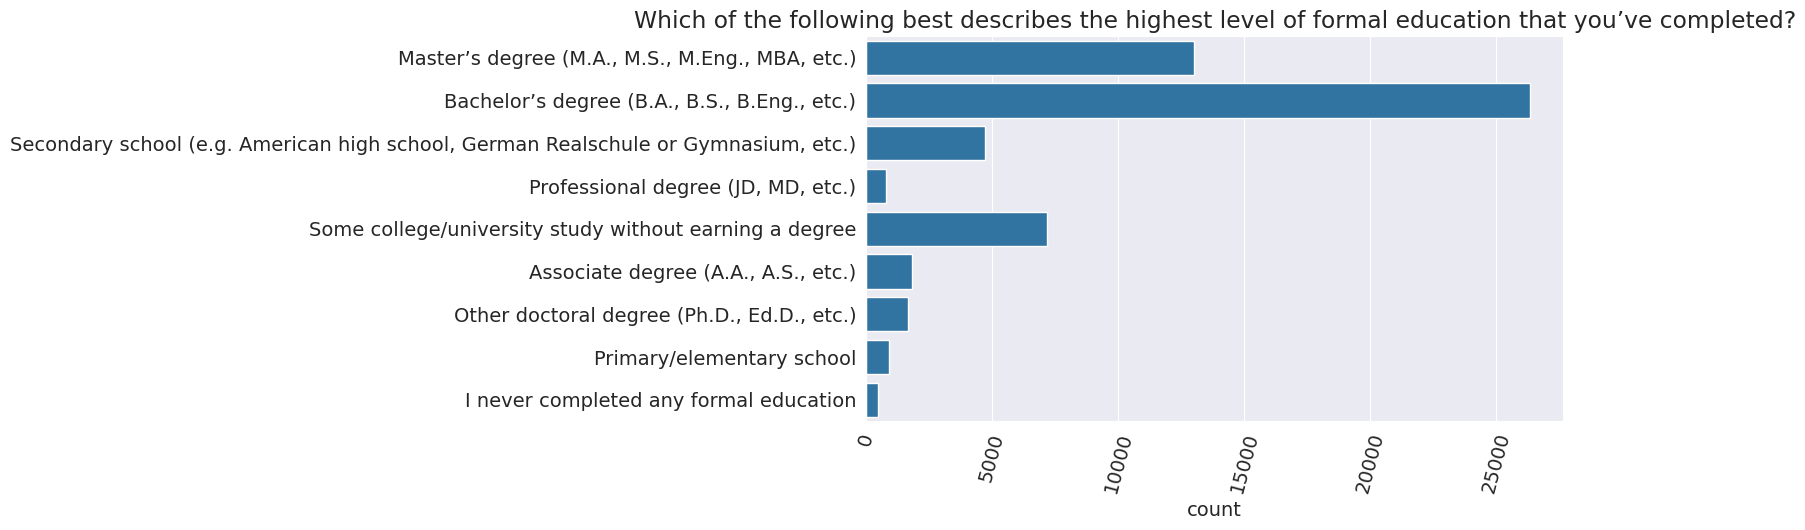

In [40]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [41]:
schema.UndergradMajor

'What was your primary field of study?'

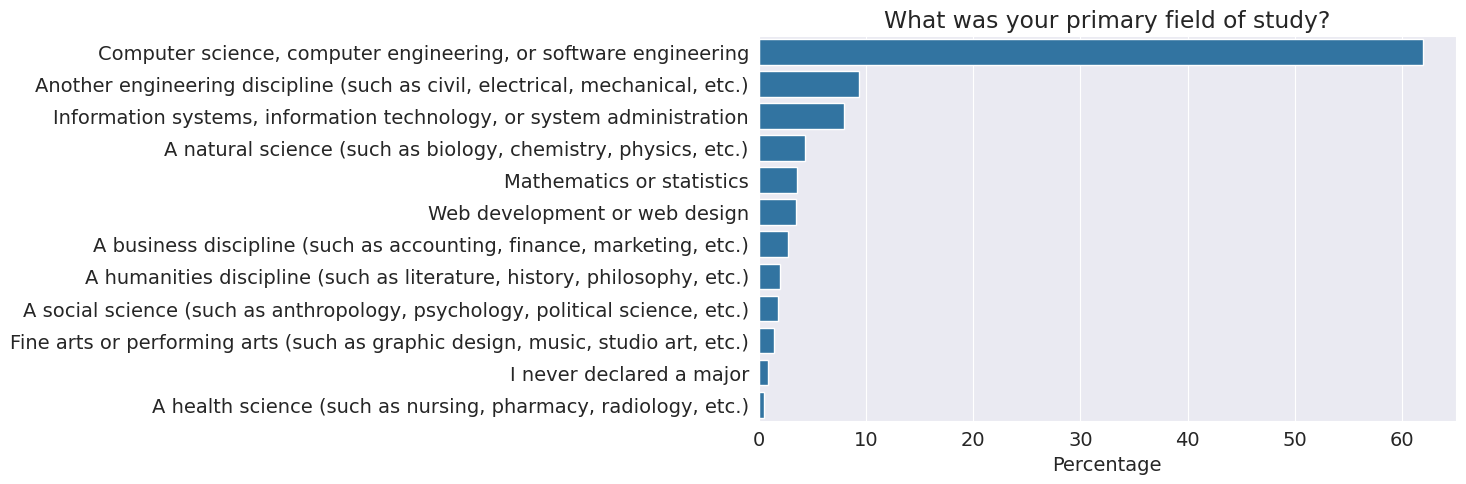

In [42]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

In [43]:
schema.Employment

'Which of the following best describes your current employment status?'

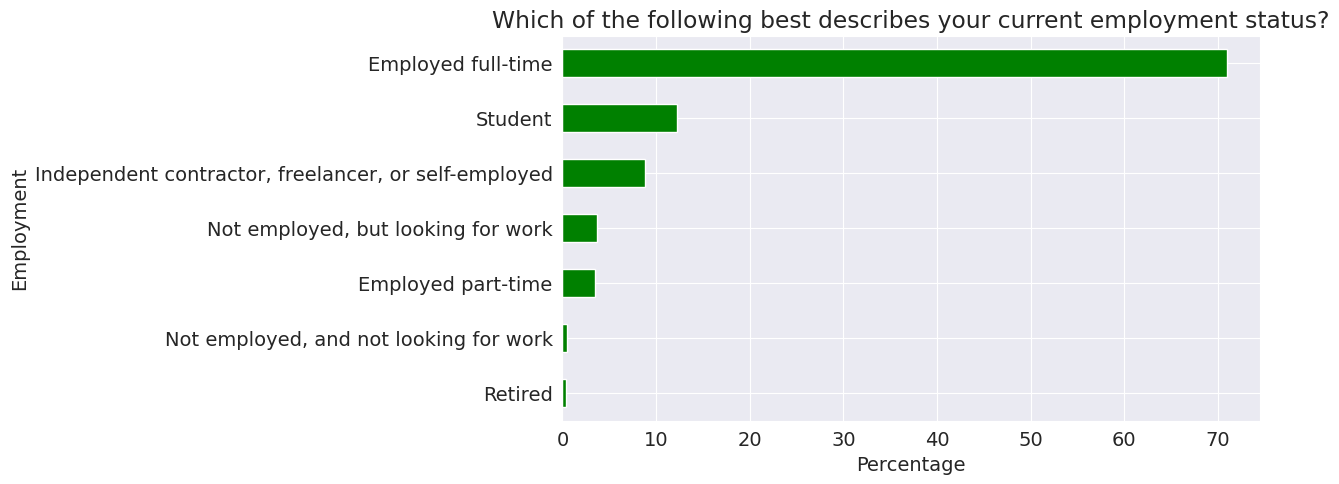

In [44]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [45]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [46]:
survey_df.DevType.value_counts()

,count
DevType,
"Developer, full-stack",4396
"Developer, back-end",3056
"Developer, back-end;Developer, front-end;Developer, full-stack",2214
"Developer, back-end;Developer, full-stack",1465
"Developer, front-end",1390
...,...
"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Marketing or sales professional;Product manager;Senior executive/VP;System administrator",1
"Data or business analyst;Developer, back-end;DevOps specialist;Engineering manager",1
"Academic researcher;Data or business analyst;DevOps specialist;Engineer, data",1


In [50]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():  # <-- changed here
        # Break each value into list of options
        for option in value.split(';'):
            option = option.strip()  # Optional: clean up whitespace
            # Add the option as a column to result
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [51]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [52]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

,0
"Developer, back-end",26996
"Developer, full-stack",26915
"Developer, front-end",18128
"Developer, desktop or enterprise applications",11687
"Developer, mobile",9406
DevOps specialist,5915
Database administrator,5658
Designer,5262
System administrator,5185
"Developer, embedded applications or devices",4701


In [54]:
survey_df.LanguageWorkedWith

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
64456,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,NaN
64459,HTML/CSS


In [55]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [56]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

,0
JavaScript,59.893323
HTML/CSS,55.801947
SQL,48.444935
Python,39.001026
Java,35.618760
Bash/Shell/PowerShell,29.239884
C#,27.803004
PHP,23.130035
TypeScript,22.461357
C++,21.114670


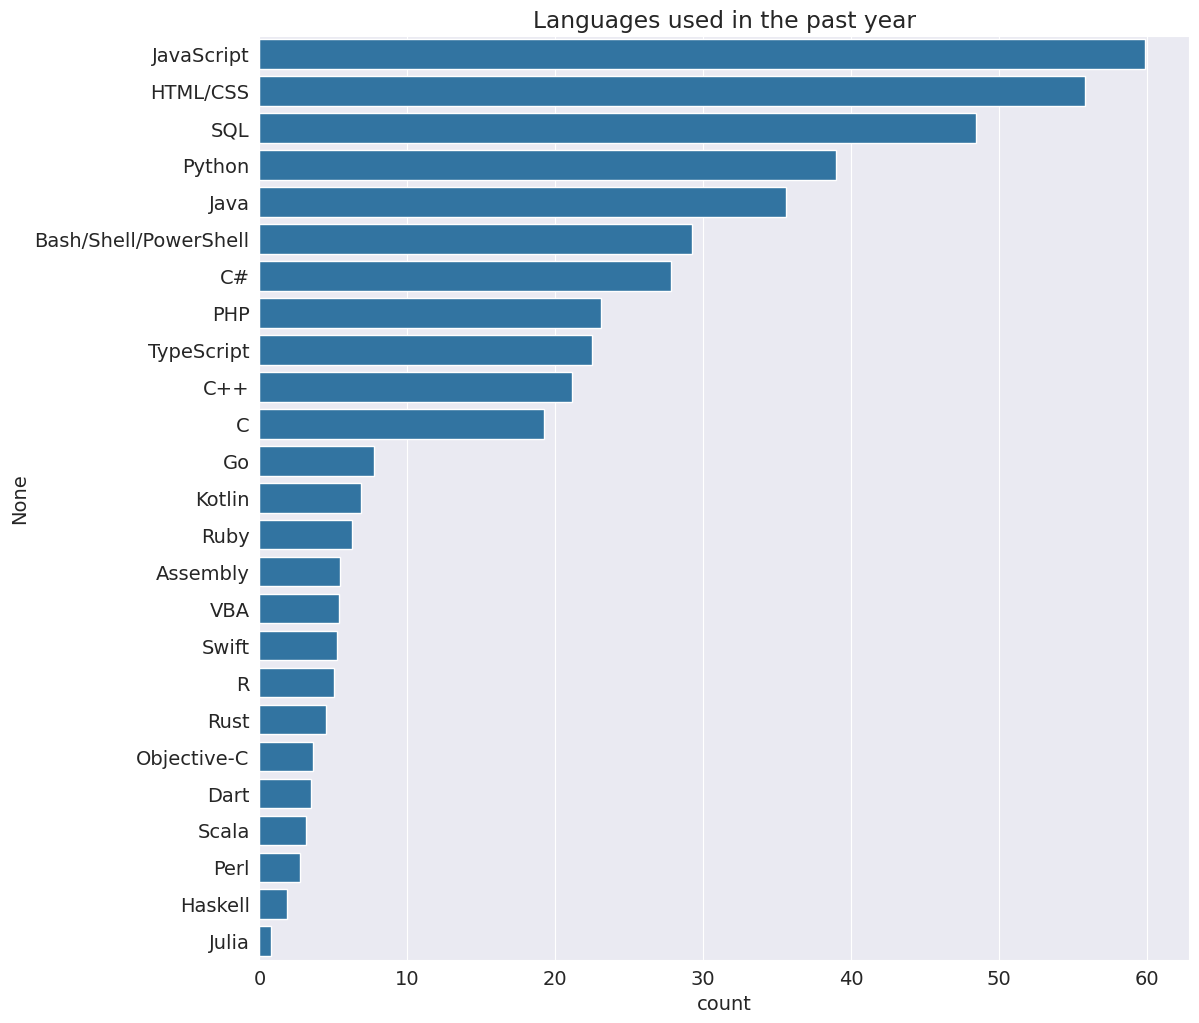

In [58]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

In [59]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

,0
Python,41.143906
JavaScript,40.425466
HTML/CSS,32.028116
SQL,30.799614
TypeScript,26.451653
C#,21.058688
Java,20.464653
Go,19.432090
Bash/Shell/PowerShell,18.057413
Rust,16.270643


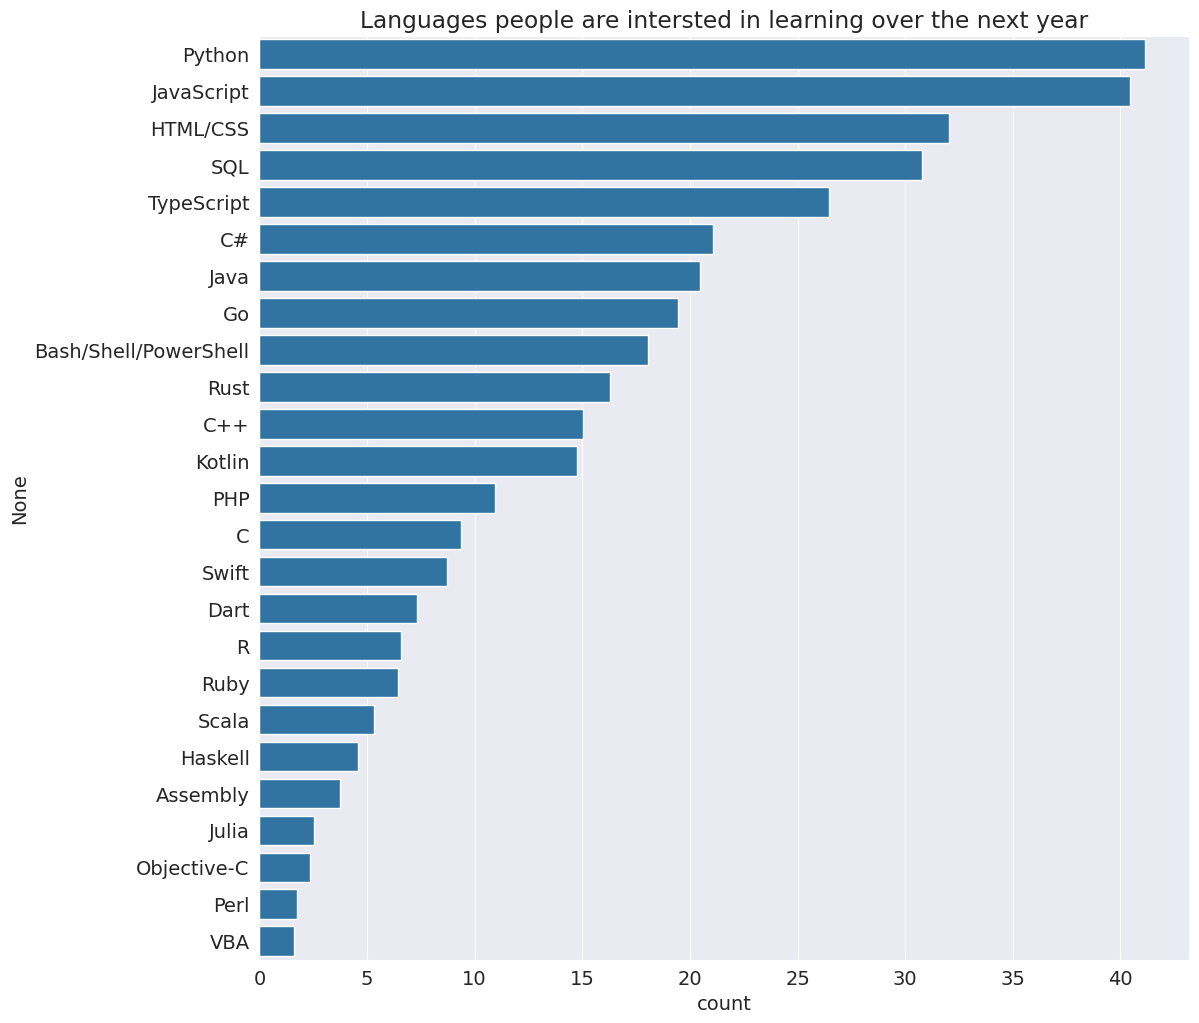

In [60]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

In [61]:
languages_loved_df = languages_worked_df & languages_interested_df

In [62]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

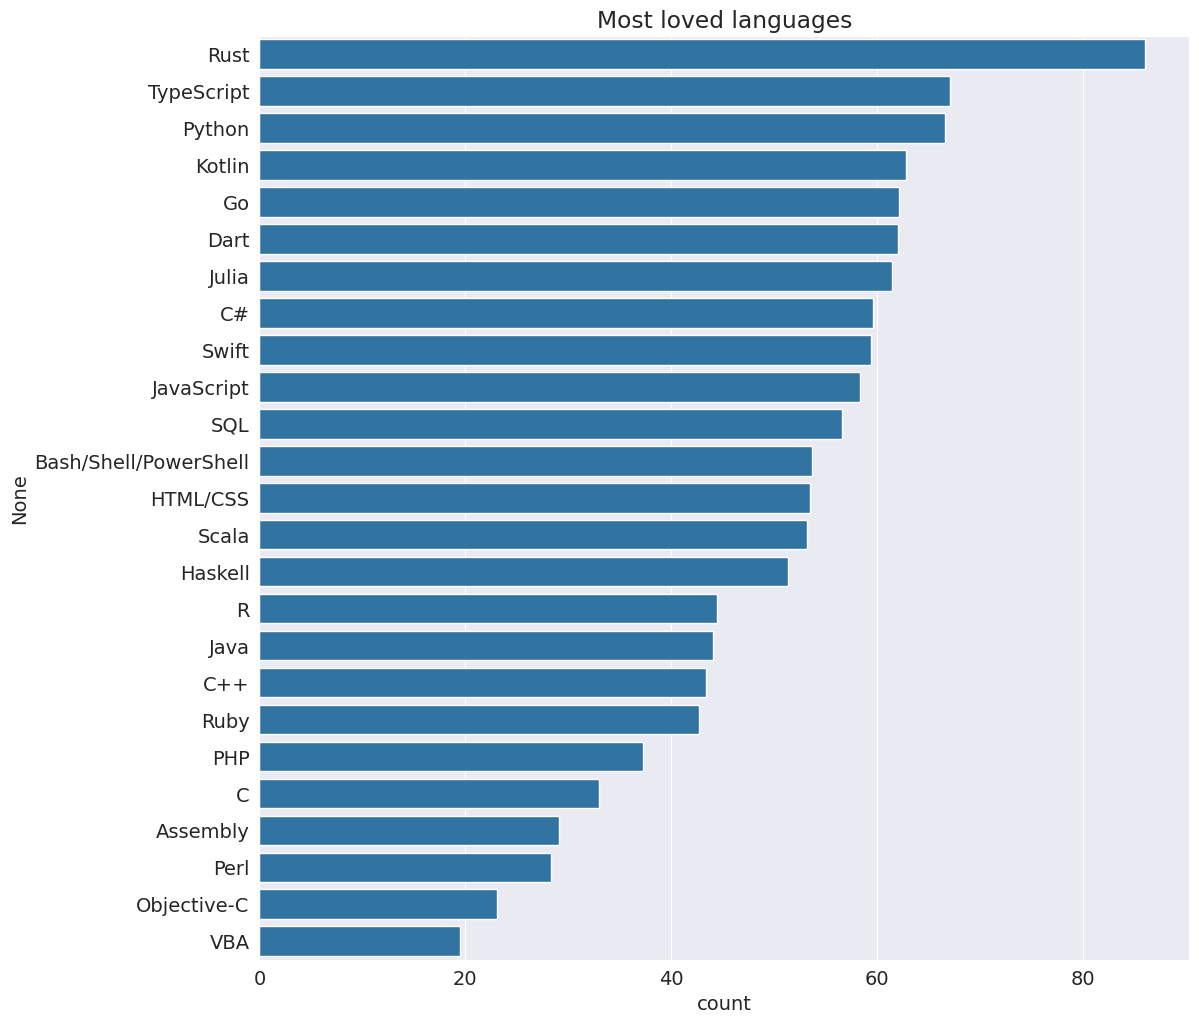

In [63]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

In [64]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [65]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [66]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


In [67]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

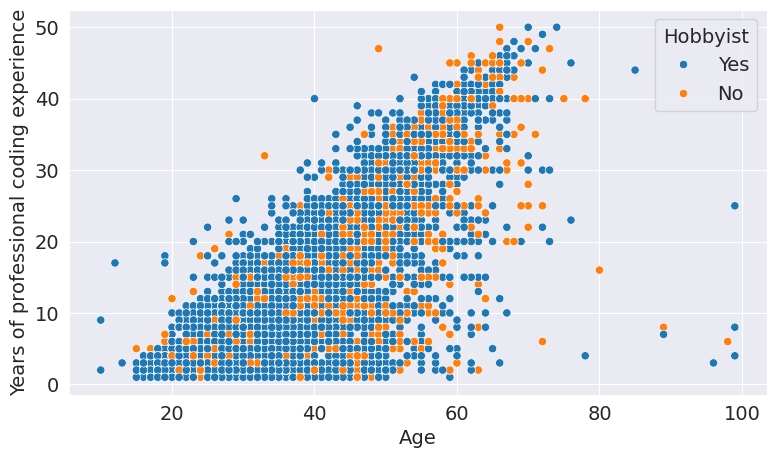

In [68]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

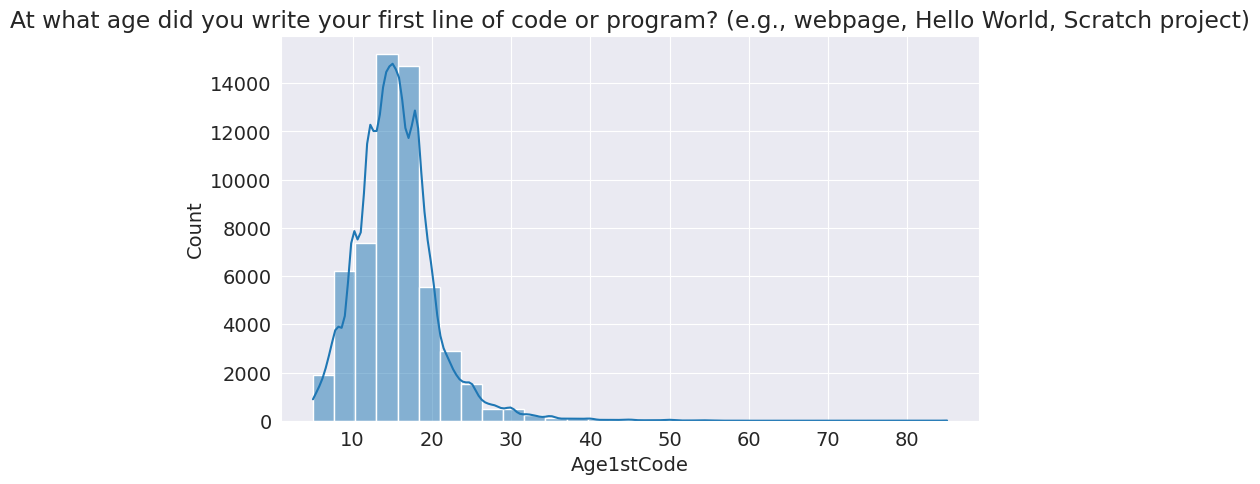

In [69]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);